# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342234 entries, 0 to 2342233
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21092
Address                             12
Zip Code                         14544
Council District                 47533
APD Sector                        9248
APD District                      9736
PRA                              11050
Census Tract                    457205
Clearance Status                611239
Clearance Date                  342049
UCR Category                   1541532
Category Description           1541532
X-coordinate                     10435
Y-coordinate                     10435
Latitude                         39685
Longitude                

Incident Number Highest Offense Description  Highest Offense Code  \
0      20191571574               FRAUD - OTHER                  1199   
1      20191550153              DEADLY CONDUCT                   408   
2      20195022816      THEFT OF LICENSE PLATE                   614   
3      20205007833               RUNAWAY CHILD                  4100   
4      20191671388       BURGLARY OF RESIDENCE                   500   

  Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
0               N  06/03/2019 04:00:00 PM    06/03/2019         1600.0   
1               N  06/04/2019 03:12:00 AM    06/04/2019          312.0   
2               N  06/03/2019 03:00:00 PM    06/03/2019         1500.0   
3               N  02/22/2020 06:00:00 PM    02/22/2020         1800.0   
4               N  06/14/2019 12:00:00 PM    06/14/2019         1200.0   

         Report Date Time Report Date  Report Time  \
0  06/06/2019 05:34:00 PM  06/06/2019       1734.0   
1  06/04/2019 03:16:00 AM  06/04/2019        316.0   
2  06/04/2019 03:22:00 PM  06/04/2019       1522.0   
3  02/24/2020 06:03:00 PM  02/24/2020       1803.0   
4  06/16/2019 10:00:00 PM  06/16/2019       2200.0   

                 Location Type                       Address  Zip Code  \
0  DEPARTMENT / DISCOUNT STORE            10817 BALLARD PATH   78717.0   
1             RESIDENCE / HOME          8312 N IH 35 SVRD SB   78753.0   
2             RESIDENCE / HOME                6312 LIBYAN DR   78745.0   
3             RESIDENCE / HOME            13012 DEARBONNE DR   78617.0   
4             RESIDENCE / HOME  3809 SPICEWOOD SPRINGS RD EB   78731.0   

   Council District APD Sector APD District    PRA  Census Tract  \
0               6.0         AD            5  573.0        203.11   
1               4.0         ED            1  250.0         18.06   
2               2.0         FR            4  509.0         24.09   
3               2.0         HE            7  612.0           NaN   
4              10.0         BA            8  256.0         17.51   

  Clearance Status Clearance Date UCR Category Category Description  \
0              NaN            NaN          NaN                  NaN   
1                N     06/06/2019          13A   Aggravated Assault   
2                N     06/04/2019          23G                Theft   
3                N     03/03/2020          NaN                  NaN   
4                N     09/18/2019          220             Burglary   

   X-coordinate  Y-coordinate   Latitude  Longitude  \
0     3097785.0     3097785.0  30.483646 -97.789495   
1     3128227.0     3128227.0  30.346646 -97.696573   
2     3098393.0     3098393.0  30.205267 -97.794900   
3     3155456.0     3155456.0  30.176140 -97.615031   
4     3111039.0     3111039.0  30.364987 -97.750587   

                      Location  
0   (30.48364631, -97.7894953)  
1  (30.34664576, -97.69657342)  
2  (30.20526729, -97.79490043)  
3   (30.17613952, -97.6150307)  
4  (30.36498691, -97.75058749)

Incident Number  Highest Offense Description  Highest Offense Code  \
2342229      20143631822           FAMILY DISTURBANCE                  3400   
2342230      20191270738         THEFT BY SHOPLIFTING                   607   
2342231       2008501470  CRIMINAL TRESPASS/TRANSIENT                  2721   
2342232    2003921400113                          DWI                  2100   
2342233      20081340129    URINATING IN PUBLIC PLACE                  3212   

        Family Violence      Occurred Date Time Occurred Date  Occurred Time  \
2342229               N  12/29/2014 11:41:00 PM    12/29/2014         2341.0   
2342230               N  05/07/2019 10:50:00 AM    05/07/2019         1050.0   
2342231               N  02/19/2008 05:00:00 PM    02/19/2008         1700.0   
2342232               N  05/20/2003 01:32:00 AM    05/20/2003          132.0   
2342233               N  05/13/2008 01:10:00 AM    05/13/2008          110.0   

               Report Date Time Report Date  Report Time  \
2342229  12/29/2014 11:41:00 PM  12/29/2014       2341.0   
2342230  05/07/2019 11:31:00 AM  05/07/2019       1131.0   
2342231  02/19/2008 05:00:00 PM  02/19/2008       1700.0   
2342232  05/20/2003 01:32:00 AM  05/20/2003        132.0   
2342233  05/13/2008 01:10:00 AM  05/13/2008        110.0   

                        Location Type               Address  Zip Code  \
2342229              RESIDENCE / HOME    109 MASTERSON PASS   78753.0   
2342230   DEPARTMENT / DISCOUNT STORE    11423 N LAMAR BLVD   78753.0   
2342231         PARKING LOTS / GARAGE       6800 BERKMAN DR   78723.0   
2342232  STREETS / HWY / ROAD / ALLEY  4500 N MOPAC EXPY NB   78731.0   
2342233  STREETS / HWY / ROAD / ALLEY    400 BLOCK E 6TH ST   78701.0   

         Council District APD Sector APD District  PRA  Census Tract  \
2342229               4.0         ED            1  240         18.23   
2342230               7.0         ED            4  221         18.24   
2342231               1.0         ID            5  293         21.00   
2342232              10.0         BA            6  325          1.00   
2342233               9.0         GE            2  382         11.00   

        Clearance Status Clearance Date UCR Category Category Description  \
2342229                N     01/02/2015          NaN                  NaN   
2342230              NaN            NaN          23C                Theft   
2342231              NaN            NaN          NaN                  NaN   
2342232                C     05/22/2003          NaN                  NaN   
2342233                C     05/17/2008          NaN                  NaN   

         X-coordinate  Y-coordinate   Latitude  Longitude  \
2342229     3130776.0     3130776.0  30.369795 -97.687855   
2342230     3131578.0     3131578.0  30.383630 -97.684932   
2342231     3130390.0     3130390.0  30.320281 -97.690437   
2342232     3109748.0     3109748.0  30.320565 -97.755869   
2342233     3115491.0     3115491.0  30.267351 -97.739093   

                            Location  
2342229  (30.36979494, -97.68785533)  
2342230  (30.38362955, -97.68493154)  
2342231   (30.32028083, -97.6904366)  
2342232   (30.32056515, -97.7558693)  
2342233  (30.26735144, -97.73909331)

## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
def clean_data(df):
    drop_col = [
        "Highest Offense Code",
        "Incident Number",
        "Occurred Time",
        "Occurred Date",
        "Report Date",
        "Report Time",
        "UCR Category",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "pra",
        "census_tract",
        "location_type",
        "apd_district",
        "apd_sector",
        "clearance_status",
        "category_description",
    ]
    df[fillna].fillna("Unknown", inplace=True)

    date_col = ["occurred_date_time", "report_date_time", "clearance_date"]

    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "pra",
        "census_tract",
        "category_description",
    ]

    df.family_violence = df.family_violence.replace({"Y": "True", "N": "False"})
    df.clearance_status = df.clearance_status.replace(
        {"C": "True", "O": "True", "N": "False"}
    )

    df[cat_col] = df[cat_col].astype("category")

    df[date_col] = df[date_col].astype("datetime64")

    df["year"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.day
    df["hour"] = pd.to_datetime(df["occurred_date_time"], format="%m/%d/%Y").dt.hour

    df.set_index(["occurred_date_time"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [7]:
df.duplicated().sum()

701

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Re-examining the dataframe
display(df.info())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2341533 entries, 2003-01-01 00:00:00 to NaT
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   pra                          category      
 10  census_tract                 category      
 11  clearance_status             object        
 12  clearance_date               datetime64[ns]
 13  category_description         category      
 14  latitude                     float64       
 15  longitude                    flo

None

highest_offense_description family_violence  \
occurred_date_time                                                   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                     FORGERY AND PASSING           False   
2003-01-01          AGG SEXUAL ASSAULT CHILD/OBJEC           False   
2003-01-01                          IDENTITY THEFT           False   
2003-01-01                          IDENTITY THEFT           False   

                      report_date_time                    location_type  \
occurred_date_time                                                        
2003-01-01         2012-01-23 09:41:00  SPECIALTY  STORE (TV  FUR ETC.)   
2003-01-01         2003-09-13 09:35:00     COMMERCIAL / OFFICE BUILDING   
2003-01-01         2008-09-17 11:43:00                 RESIDENCE / HOME   
2003-01-01         2013-03-11 17:28:00                 RESIDENCE / HOME   
2003-01-01         2009-08-07 14:23:00                 RESIDENCE / HOME   

                                      address zip_code council_district  \
occurred_date_time                                                        
2003-01-01              1533 CUTTING HORSE LN  78727.0              7.0   
2003-01-01                     8501 BURNET RD  78757.0              7.0   
2003-01-01          2500 BLOCK S CONGRESS AVE  78704.0              3.0   
2003-01-01                7001 S CONGRESS AVE  78745.0              2.0   
2003-01-01                    6800 MC NEIL DR  78729.0              6.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
2003-01-01                 ED            4  193.0          NaN   
2003-01-01                 ID            7  234.0        18.18   
2003-01-01                 DA            2  479.0        23.00   
2003-01-01                 FR            3  528.0        24.22   
2003-01-01                 AD            4  169.0       204.10   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
2003-01-01                    False     2012-01-23                  NaN   
2003-01-01                      NaN     2003-09-15                  NaN   
2003-01-01                    False     2008-10-27                 Rape   
2003-01-01                    False     2013-03-12                  NaN   
2003-01-01                      NaN            NaT                  NaN   

                     latitude  longitude    year  month  week  day  hour  
occurred_date_time                                                        
2003-01-01          30.416668 -97.683656  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.366117 -97.727721  2003.0    1.0   1.0  1.0   0.0  
2003-01-01                NaN        NaN  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.188878 -97.780075  2003.0    1.0   1.0  1.0   0.0  
2003-01-01          30.438983 -97.759669  2003.0    1.0   1.0  1.0   0.0

highest_offense_description family_violence  \
occurred_date_time                                                 
NaT                            SUSPICIOUS PERSON           False   
NaT                            SUSPICIOUS PERSON           False   
NaT                 POSS CONTROLLED SUB/NARCOTIC           False   
NaT                                RUNAWAY CHILD           False   
NaT                          BURGLARY OF VEHICLE           False   

                      report_date_time     location_type  \
occurred_date_time                                         
NaT                2005-05-24 20:14:00               NaN   
NaT                2008-01-11 10:33:00               NaN   
NaT                2007-04-04 18:39:00               NaN   
NaT                2004-02-24 22:55:00               NaN   
NaT                2003-05-06 10:47:00  RESIDENCE / HOME   

                                        address zip_code council_district  \
occurred_date_time                                                          
NaT                            8200 GEORGIAN DR  78753.0              4.0   
NaT                 SAN JACINTO BLVD / E 4TH ST  78701.0              9.0   
NaT                                1511 FARO DR  78741.0              3.0   
NaT                           400 W LIVE OAK ST  78704.0              9.0   
NaT                         1908 SAN ANTONIO ST  78705.0              9.0   

                   apd_sector apd_district    pra census_tract  \
occurred_date_time                                               
NaT                        ED            1  250.0        18.00   
NaT                        GE            2  381.0        11.00   
NaT                        HE            3  442.0        23.17   
NaT                        DA            1  476.0        13.00   
NaT                        BA            1  359.0         6.00   

                   clearance_status clearance_date category_description  \
occurred_date_time                                                        
NaT                           False     2005-06-28                  NaN   
NaT                             NaN     2008-01-16                  NaN   
NaT                           False     2007-07-25                  NaN   
NaT                           False     2004-02-25                  NaN   
NaT                           False            NaT                Theft   

                     latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                      
NaT                 30.347657 -97.703221   NaN    NaN   NaN  NaN   NaN  
NaT                 30.265527 -97.741069   NaN    NaN   NaN  NaN   NaN  
NaT                 30.235041 -97.713595   NaN    NaN   NaN  NaN   NaN  
NaT                 30.243872 -97.755879   NaN    NaN   NaN  NaN   NaN  
NaT                 30.282945 -97.743406   NaN    NaN   NaN  NaN   NaN

## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

zip_code
78741.0    209738
78753.0    182094
78701.0    170626
78758.0    162430
78704.0    157160
78745.0    153253
78702.0    138371
78744.0    128340
78723.0    120375
78752.0     85921
78748.0     69476
78759.0     67706
78751.0     65248
78757.0     58848
78705.0     58077
78721.0     48425
78749.0     41098
78724.0     38309
78727.0     36623
78703.0     35812
78731.0     29319
78746.0     28540
78729.0     25897
78750.0     24234
78754.0     23519

zip_code
78741.0  0.090133
78753.0  0.078253
78701.0  0.073325
78758.0  0.069803
78704.0  0.067538
78745.0  0.065859
78702.0  0.059463
78744.0  0.055153
78723.0  0.051730
78752.0  0.036924
78748.0  0.029857
78759.0  0.029096
78751.0  0.028040
78757.0  0.025289
78705.0  0.024958
78721.0  0.020810
78749.0  0.017661
78724.0  0.016463
78727.0  0.015738
78703.0  0.015390
78731.0  0.012600
78746.0  0.012265
78729.0  0.011129
78750.0  0.010414
78754.0  0.010107

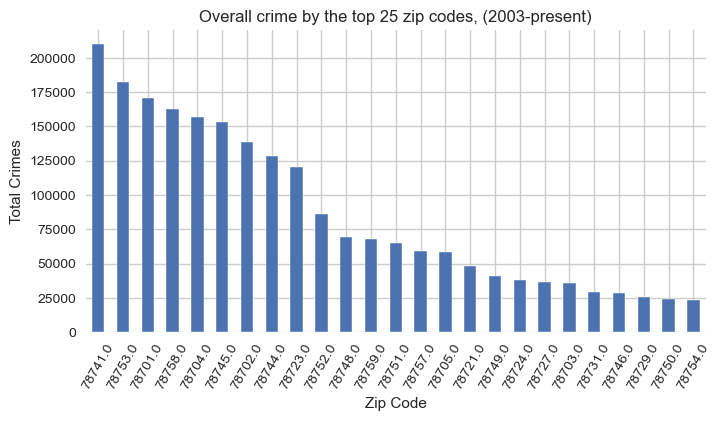

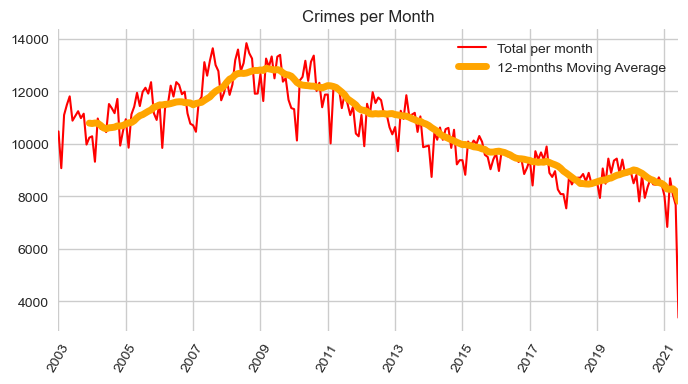

In [10]:
plt.style.use("seaborn")
sb.set_style("whitegrid")
%matplotlib inline

# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
plt.figure(dpi=100, figsize=(8, 4))
df.zip_code.value_counts().head(25).plot.bar(
    title="Overall crime by the top 25 zip codes, (2003-present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(dpi=100, figsize=(8, 4))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange",
    linewidth=5,
    label="12-months Moving Average",
    title="Crimes per Month",
    xlabel="",
    rot=60,
)
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

highest_offense_description
BURGLARY OF VEHICLE                                  232774
THEFT                                                214034
FAMILY DISTURBANCE                                   183429
CRIMINAL MISCHIEF                                    129366
ASSAULT W/INJURY-FAM/DATE VIOL                        79258
BURGLARY OF RESIDENCE                                 77758
DWI                                                   70240
PUBLIC INTOXICATION                                   69055
HARASSMENT                                            65120
DISTURBANCE - OTHER                                   62560

BURGLARY OF VEHICLE  HARASSMENT  CRIMINAL MISCHIEF  \
occurred_date_time                                                       
2003-01-31                         1225         293                722   
2003-02-28                         1110         309                594   
2003-03-31                         1222         363                700   
2003-04-30                         1396         353                709   
2003-05-31                         1487         345                750   
...                                 ...         ...                ...   
2021-02-28                          309         168                339   
2021-03-31                          431         194                430   
2021-04-30                          369         168                415   
2021-05-31                          347         144                393   
2021-06-30                          133          73                160   

                    ASSAULT W/INJURY-FAM/DATE VIOL  BURGLARY OF RESIDENCE  \
occurred_date_time                                                          
2003-01-31                                     349                    328   
2003-02-28                                     342                    248   
2003-03-31                                     421                    393   
2003-04-30                                     432                    398   
2003-05-31                                     424                    436   
...                                            ...                    ...   
2021-02-28                                     245                    119   
2021-03-31                                     259                    154   
2021-04-30                                     268                    128   
2021-05-31                                     312                    154   
2021-06-30                                     140                     66   

                    PUBLIC INTOXICATION  DWI  FAMILY DISTURBANCE  TOTAL  
occurred_date_time                                                       
2003-01-31                          341  407                 505   4170  
2003-02-28                          354  328                 500   3785  
2003-03-31                          450  406                 546   4501  
2003-04-30                          385  375                 678   4726  
2003-05-31                          451  418                 650   4961  
...                                 ...  ...                 ...    ...  
2021-02-28                           62  130                 812   2184  
2021-03-31                           75  179                 876   2598  
2021-04-30                           67  124                 799   2338  
2021-05-31                           61  138                 884   2433  
2021-06-30                           36   65                 364   1037  

[222 rows x 9 columns]

<Figure size 432x288 with 0 Axes>

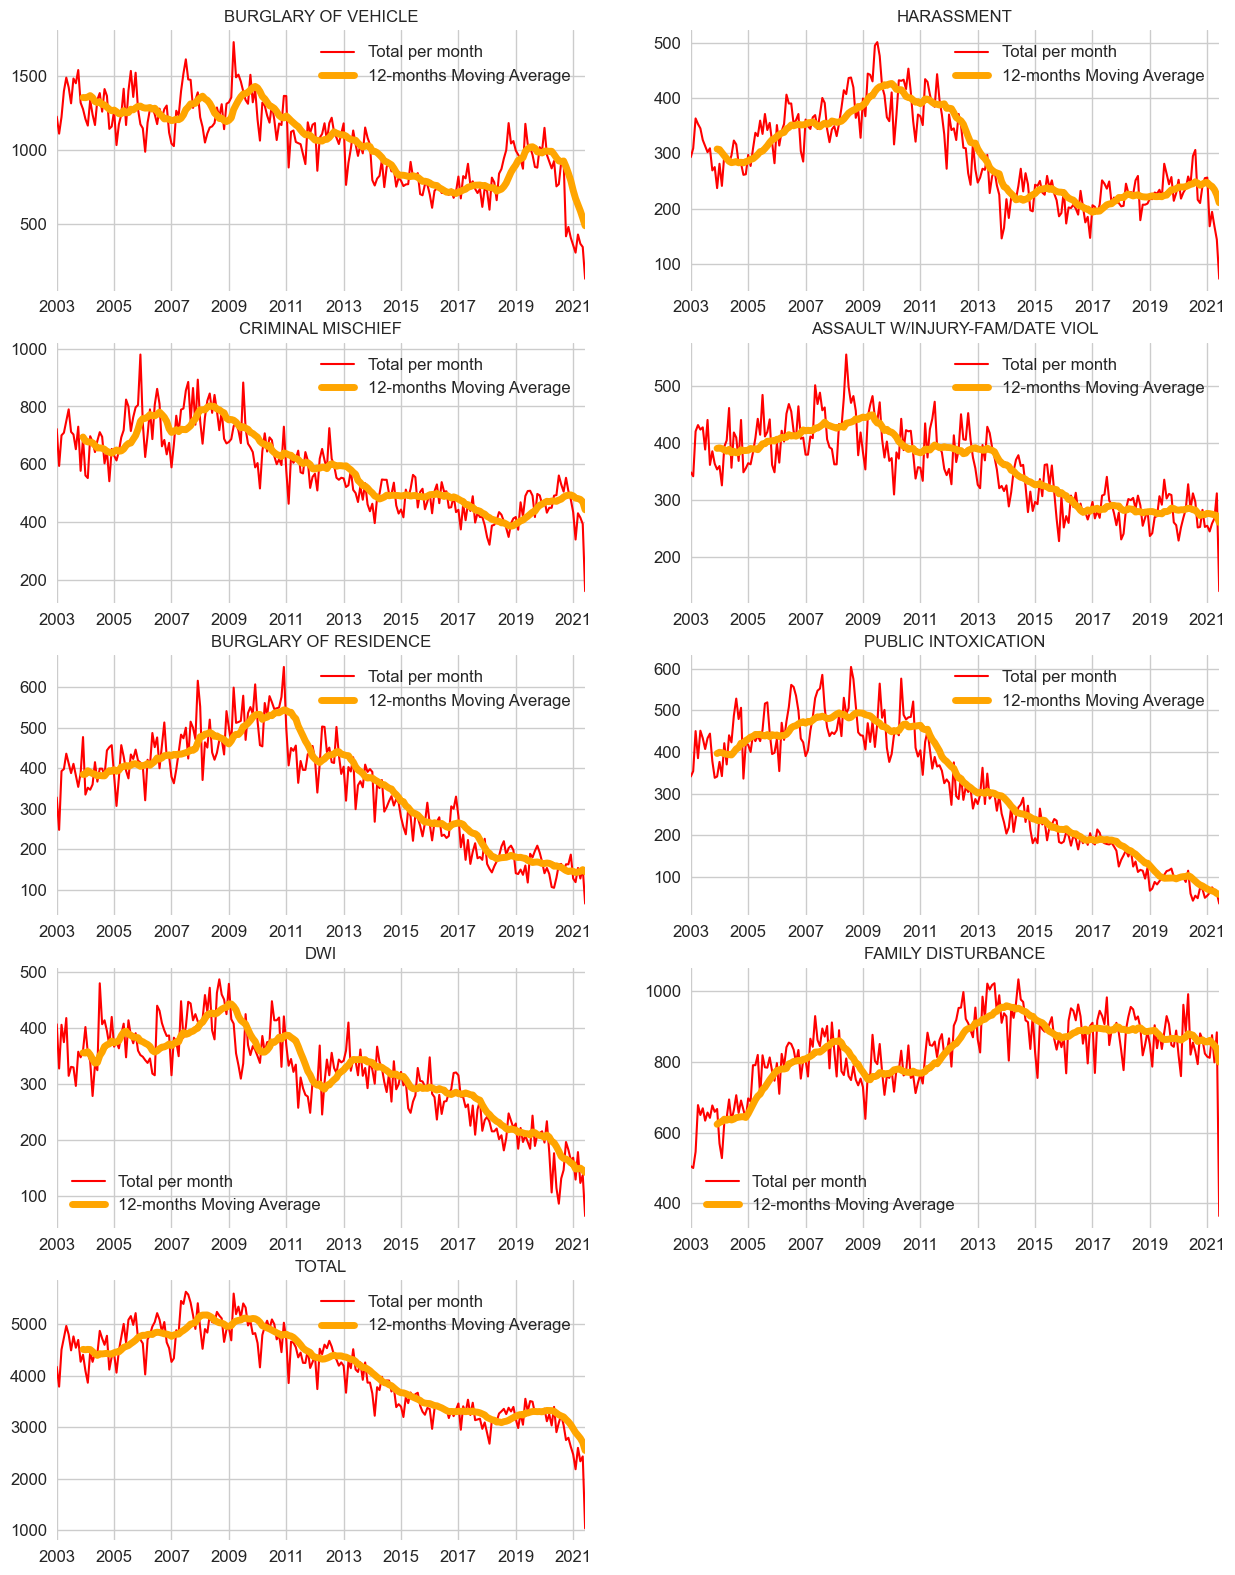

In [11]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20), dpi=100)

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

highest_offense_description
PUBLIC INTOXICATION                                   17217
THEFT                                                 15977
BURGLARY OF VEHICLE                                    9356
WARRANT ARREST NON TRAFFIC                             8969
DWI                                                    8359
ASSAULT WITH INJURY                                    7668
VIOL CITY ORDINANCE - OTHER                            6193
POSS OF DRUG PARAPHERNALIA                             6102
CRIMINAL MISCHIEF                                      5935
CRIMINAL TRESPASS                                      3972
POSSESSION OF MARIJUANA                                3410
DISTURBANCE - OTHER                                    3404
CUSTODY ARREST TRAFFIC WARR                            2993
POSS CONTROLLED SUB/NARCOTIC                           2929
CAMPING IN PARK                                        2785
VOCO - ALCOHOL  CONSUMPTION                            2690
ASSAULT BY CONTACT                                     2643
CRIMINAL TRESPASS/TRANSIENT                            2595
THEFT OF BICYCLE                                       2552
URINATING IN PUBLIC PLACE                              2338
FAMILY DISTURBANCE                                     2219
DOC FIGHTING                                           2148
PROTECTIVE ORDER                                       2099
ASSAULT W/INJURY-FAM/DATE VIOL                         1749

highest_offense_description
PUBLIC INTOXICATION                                0.100905
THEFT                                              0.093638
BURGLARY OF VEHICLE                                0.054833
WARRANT ARREST NON TRAFFIC                         0.052565
DWI                                                0.048990
ASSAULT WITH INJURY                                0.044940
VIOL CITY ORDINANCE - OTHER                        0.036296
POSS OF DRUG PARAPHERNALIA                         0.035762
CRIMINAL MISCHIEF                                  0.034784
CRIMINAL TRESPASS                                  0.023279
POSSESSION OF MARIJUANA                            0.019985
DISTURBANCE - OTHER                                0.019950
CUSTODY ARREST TRAFFIC WARR                        0.017541
POSS CONTROLLED SUB/NARCOTIC                       0.017166
CAMPING IN PARK                                    0.016322
VOCO - ALCOHOL  CONSUMPTION                        0.015765
ASSAULT BY CONTACT                                 0.015490
CRIMINAL TRESPASS/TRANSIENT                        0.015209
THEFT OF BICYCLE                                   0.014957
URINATING IN PUBLIC PLACE                          0.013702
FAMILY DISTURBANCE                                 0.013005
DOC FIGHTING                                       0.012589
PROTECTIVE ORDER                                   0.012302
ASSAULT W/INJURY-FAM/DATE VIOL                     0.010250

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

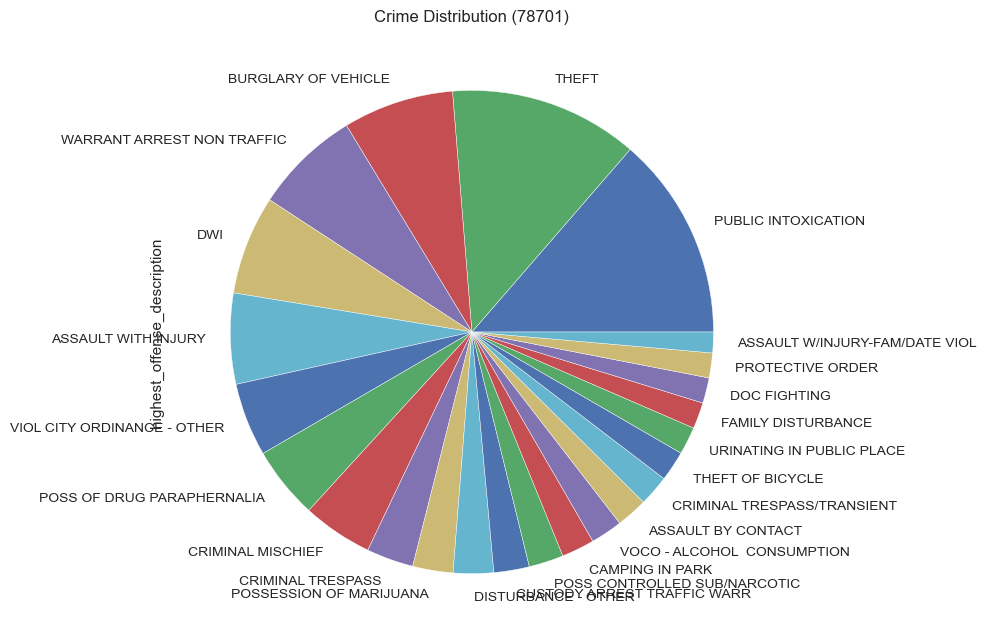

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(
    df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

highest_offense_description
THEFT                                                 17305
BURGLARY OF VEHICLE                                   16047
FAMILY DISTURBANCE                                    14982
CRIMINAL MISCHIEF                                      9601
THEFT BY SHOPLIFTING                                   7720
ASSAULT W/INJURY-FAM/DATE VIOL                         7286
BURGLARY OF RESIDENCE                                  6122
DWI                                                    5101
DISTURBANCE - OTHER                                    4853
CUSTODY ARREST TRAFFIC WARR                            4364
AUTO THEFT                                             4350
HARASSMENT                                             4320
POSS OF DRUG PARAPHERNALIA                             3743
ASSAULT WITH INJURY                                    3399
PUBLIC INTOXICATION                                    3387
CRIMINAL TRESPASS                                      3190
POSS CONTROLLED SUB/NARCOTIC                           3022
RUNAWAY CHILD                                          2968
WARRANT ARREST NON TRAFFIC                             2802
POSSESSION OF MARIJUANA                                2723
BURGLARY NON RESIDENCE                                 2529
VIOL CITY ORDINANCE - OTHER                            1874

----------------------------------


highest_offense_description
THEFT                                              0.095033
BURGLARY OF VEHICLE                                0.088125
FAMILY DISTURBANCE                                 0.082276
CRIMINAL MISCHIEF                                  0.052726
THEFT BY SHOPLIFTING                               0.042396
ASSAULT W/INJURY-FAM/DATE VIOL                     0.040012
BURGLARY OF RESIDENCE                              0.033620
DWI                                                0.028013
DISTURBANCE - OTHER                                0.026651
CUSTODY ARREST TRAFFIC WARR                        0.023966
AUTO THEFT                                         0.023889
HARASSMENT                                         0.023724
POSS OF DRUG PARAPHERNALIA                         0.020555
ASSAULT WITH INJURY                                0.018666
PUBLIC INTOXICATION                                0.018600
CRIMINAL TRESPASS                                  0.017518
POSS CONTROLLED SUB/NARCOTIC                       0.016596
RUNAWAY CHILD                                      0.016299
WARRANT ARREST NON TRAFFIC                         0.015388
POSSESSION OF MARIJUANA                            0.014954
BURGLARY NON RESIDENCE                             0.013888
VIOL CITY ORDINANCE - OTHER                        0.010291

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

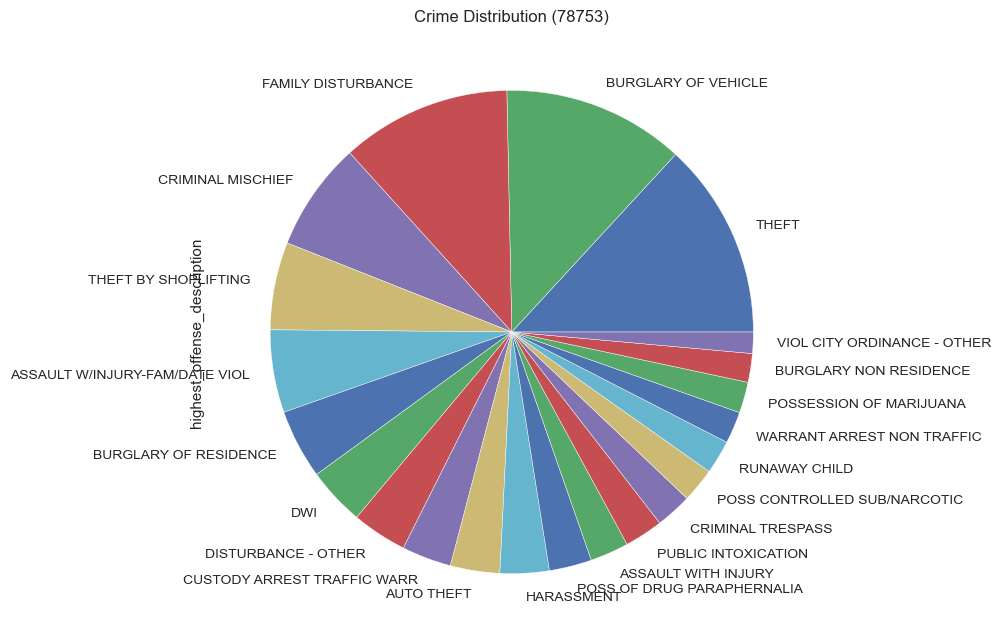

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_53_off.to_frame())
print("----------------------------------")
display(
    df_53.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)

plt.figure(dpi=100)
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

highest_offense_description
FAMILY DISTURBANCE                                    20697
BURGLARY OF VEHICLE                                   19952
THEFT                                                 15764
CRIMINAL MISCHIEF                                     11171
ASSAULT W/INJURY-FAM/DATE VIOL                         9736
BURGLARY OF RESIDENCE                                  8955
PUBLIC INTOXICATION                                    6403
CUSTODY ARREST TRAFFIC WARR                            6011
DWI                                                    5711
HARASSMENT                                             5600
DISTURBANCE - OTHER                                    5239
AUTO THEFT                                             4750
ASSAULT WITH INJURY                                    4603
CRIMINAL TRESPASS                                      3990
POSS CONTROLLED SUB/NARCOTIC                           3911
POSSESSION OF MARIJUANA                                3807
THEFT BY SHOPLIFTING                                   3600
POSS OF DRUG PARAPHERNALIA                             3555
WARRANT ARREST NON TRAFFIC                             3448
RUNAWAY CHILD                                          2815
VIOL CITY ORDINANCE - OTHER                            2197

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.098680
BURGLARY OF VEHICLE                                0.095128
THEFT                                              0.075160
CRIMINAL MISCHIEF                                  0.053262
ASSAULT W/INJURY-FAM/DATE VIOL                     0.046420
BURGLARY OF RESIDENCE                              0.042696
PUBLIC INTOXICATION                                0.030529
CUSTODY ARREST TRAFFIC WARR                        0.028660
DWI                                                0.027229
HARASSMENT                                         0.026700
DISTURBANCE - OTHER                                0.024979
AUTO THEFT                                         0.022647
ASSAULT WITH INJURY                                0.021946
CRIMINAL TRESPASS                                  0.019024
POSS CONTROLLED SUB/NARCOTIC                       0.018647
POSSESSION OF MARIJUANA                            0.018151
THEFT BY SHOPLIFTING                               0.017164
POSS OF DRUG PARAPHERNALIA                         0.016950
WARRANT ARREST NON TRAFFIC                         0.016440
RUNAWAY CHILD                                      0.013422
VIOL CITY ORDINANCE - OTHER                        0.010475

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

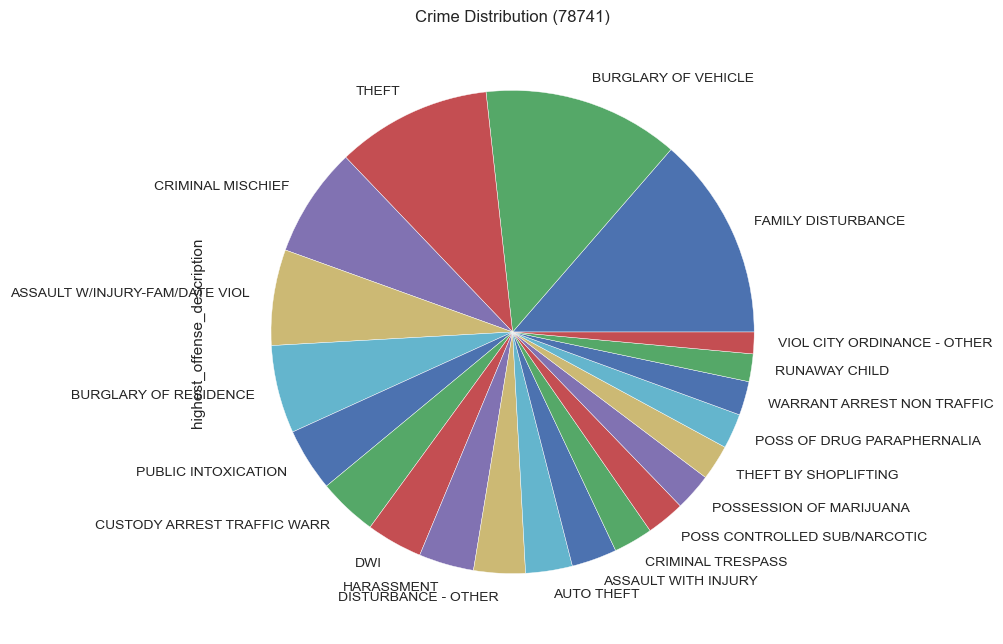

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
display(df_41_off.to_frame())
print("----------------------------------")
display(
    df_41.highest_offense_description.value_counts(normalize=True).head(21).to_frame()
)
plt.figure(dpi=100)
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

highest_offense_description
FAMILY DISTURBANCE                                    15240
BURGLARY OF VEHICLE                                   14806
THEFT                                                 13690
CRIMINAL MISCHIEF                                      8642
BURGLARY OF RESIDENCE                                  5895
ASSAULT W/INJURY-FAM/DATE VIOL                         5828
HARASSMENT                                             5183
DISTURBANCE - OTHER                                    4583
DWI                                                    4458
PUBLIC INTOXICATION                                    4018
CUSTODY ARREST TRAFFIC WARR                            3248
AUTO THEFT                                             2937
BURGLARY NON RESIDENCE                                 2901
ASSAULT WITH INJURY                                    2734
RUNAWAY CHILD                                          2623
POSSESSION OF MARIJUANA                                2599
WARRANT ARREST NON TRAFFIC                             2113
POSS CONTROLLED SUB/NARCOTIC                           2062
THEFT BY SHOPLIFTING                                   2025
CRIMINAL TRESPASS                                      1984
IDENTITY THEFT                                         1680
POSS OF DRUG PARAPHERNALIA                             1530

----------------------------------


highest_offense_description
FAMILY DISTURBANCE                                 0.099443
BURGLARY OF VEHICLE                                0.096611
THEFT                                              0.089329
CRIMINAL MISCHIEF                                  0.056390
BURGLARY OF RESIDENCE                              0.038466
ASSAULT W/INJURY-FAM/DATE VIOL                     0.038029
HARASSMENT                                         0.033820
DISTURBANCE - OTHER                                0.029905
DWI                                                0.029089
PUBLIC INTOXICATION                                0.026218
CUSTODY ARREST TRAFFIC WARR                        0.021194
AUTO THEFT                                         0.019164
BURGLARY NON RESIDENCE                             0.018929
ASSAULT WITH INJURY                                0.017840
RUNAWAY CHILD                                      0.017115
POSSESSION OF MARIJUANA                            0.016959
WARRANT ARREST NON TRAFFIC                         0.013788
POSS CONTROLLED SUB/NARCOTIC                       0.013455
THEFT BY SHOPLIFTING                               0.013213
CRIMINAL TRESPASS                                  0.012946
IDENTITY THEFT                                     0.010962
POSS OF DRUG PARAPHERNALIA                         0.009983

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

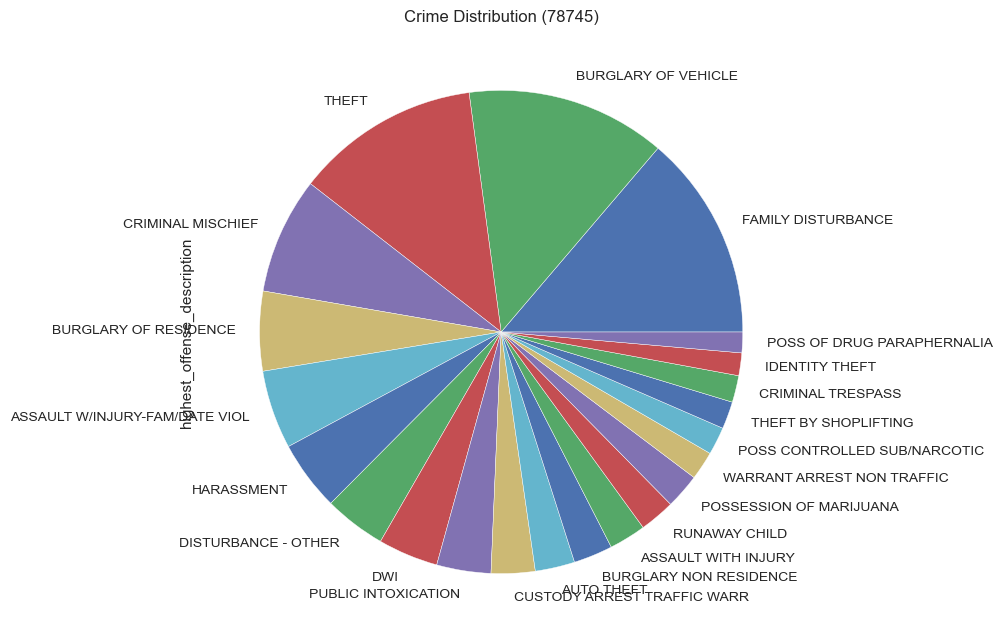

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
display(df_45_off.to_frame())
print("----------------------------------")
display(
    df_45.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

highest_offense_description
BURGLARY OF VEHICLE                                    8711
THEFT                                                  5666
CRIMINAL MISCHIEF                                      5017
THEFT OF BICYCLE                                       3546
PUBLIC INTOXICATION                                    2632
BURGLARY OF RESIDENCE                                  2138
WARRANT ARREST NON TRAFFIC                             1551
AUTO THEFT                                             1378
CRIMINAL TRESPASS                                      1374
ASSAULT WITH INJURY                                    1278
HARASSMENT                                             1238
FAMILY DISTURBANCE                                     1231
DWI                                                    1221
DISTURBANCE - OTHER                                    1129
BURGLARY NON RESIDENCE                                  892
CRIMINAL TRESPASS/TRANSIENT                             868
VIOL CITY ORDINANCE - OTHER                             792
GRAFFITI                                                786
CUSTODY ARREST TRAFFIC WARR                             782
ASSAULT W/INJURY-FAM/DATE VIOL                          708
POSSESSION OF MARIJUANA                                 665
ASSAULT BY CONTACT                                      631

'----------------------------------'

highest_offense_description
BURGLARY OF VEHICLE                                0.149991
THEFT                                              0.097560
CRIMINAL MISCHIEF                                  0.086385
THEFT OF BICYCLE                                   0.061057
PUBLIC INTOXICATION                                0.045319
BURGLARY OF RESIDENCE                              0.036813
WARRANT ARREST NON TRAFFIC                         0.026706
AUTO THEFT                                         0.023727
CRIMINAL TRESPASS                                  0.023658
ASSAULT WITH INJURY                                0.022005
HARASSMENT                                         0.021317
FAMILY DISTURBANCE                                 0.021196
DWI                                                0.021024
DISTURBANCE - OTHER                                0.019440
BURGLARY NON RESIDENCE                             0.015359
CRIMINAL TRESPASS/TRANSIENT                        0.014946
VIOL CITY ORDINANCE - OTHER                        0.013637
GRAFFITI                                           0.013534
CUSTODY ARREST TRAFFIC WARR                        0.013465
ASSAULT W/INJURY-FAM/DATE VIOL                     0.012191
POSSESSION OF MARIJUANA                            0.011450
ASSAULT BY CONTACT                                 0.010865

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

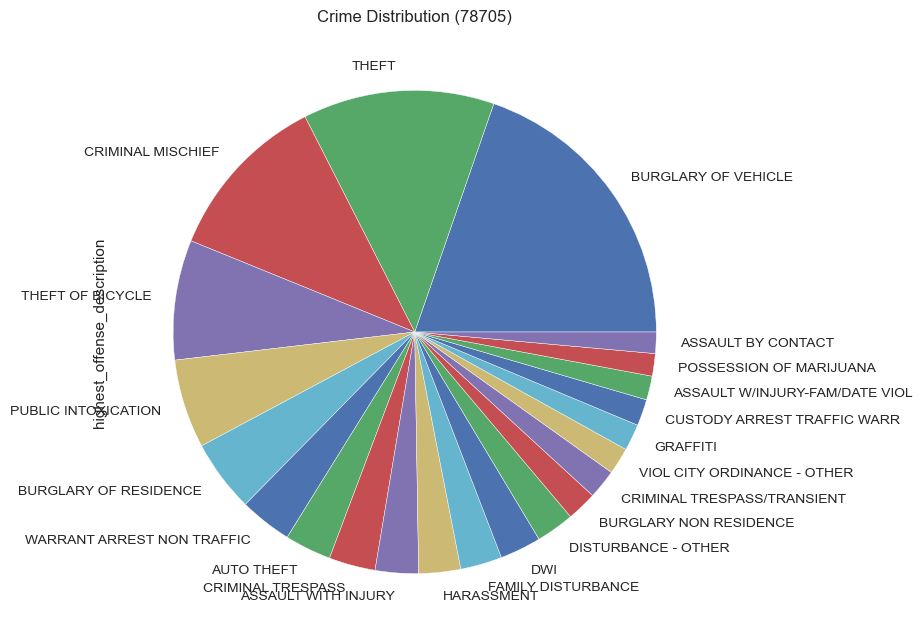

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off.to_frame())
display("----------------------------------")
display(
    df_05.highest_offense_description.value_counts(normalize=True).head(22).to_frame()
)
plt.figure(dpi=100)
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

highest_offense_description
BURGLARY OF VEHICLE                                    5440
THEFT                                                  5116
THEFT BY SHOPLIFTING                                   2563
CRIMINAL MISCHIEF                                      1282
DWI                                                     892
FAMILY DISTURBANCE                                      777
VIOL CITY ORDINANCE - OTHER                             652
HARASSMENT                                              637
AUTO THEFT                                              616
BURGLARY OF RESIDENCE                                   524
THEFT FROM PERSON                                       462
IDENTITY THEFT                                          453
DISTURBANCE - OTHER                                     439
BURGLARY NON RESIDENCE                                  359
ASSAULT W/INJURY-FAM/DATE VIOL                          342
CRED CARD ABUSE - OTHER                                 331
PUBLIC INTOXICATION                                     321
POSSESSION OF MARIJUANA                                 297
FRAUD - OTHER                                           284
SUSPICIOUS PERSON                                       259
CUSTODY ARREST TRAFFIC WARR                             247
WARRANT ARREST NON TRAFFIC                              223
ASSAULT WITH INJURY                                     200
THEFT OF BICYCLE                                        195

highest_offense_description
BURGLARY OF VEHICLE                                0.190610
THEFT                                              0.179257
THEFT BY SHOPLIFTING                               0.089804
CRIMINAL MISCHIEF                                  0.044919
DWI                                                0.031254
FAMILY DISTURBANCE                                 0.027225
VIOL CITY ORDINANCE - OTHER                        0.022845
HARASSMENT                                         0.022320
AUTO THEFT                                         0.021584
BURGLARY OF RESIDENCE                              0.018360
THEFT FROM PERSON                                  0.016188
IDENTITY THEFT                                     0.015872
DISTURBANCE - OTHER                                0.015382
BURGLARY NON RESIDENCE                             0.012579
ASSAULT W/INJURY-FAM/DATE VIOL                     0.011983
CRED CARD ABUSE - OTHER                            0.011598
PUBLIC INTOXICATION                                0.011247
POSSESSION OF MARIJUANA                            0.010406
FRAUD - OTHER                                      0.009951
SUSPICIOUS PERSON                                  0.009075
CUSTODY ARREST TRAFFIC WARR                        0.008655
WARRANT ARREST NON TRAFFIC                         0.007814
ASSAULT WITH INJURY                                0.007008
THEFT OF BICYCLE                                   0.006833

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

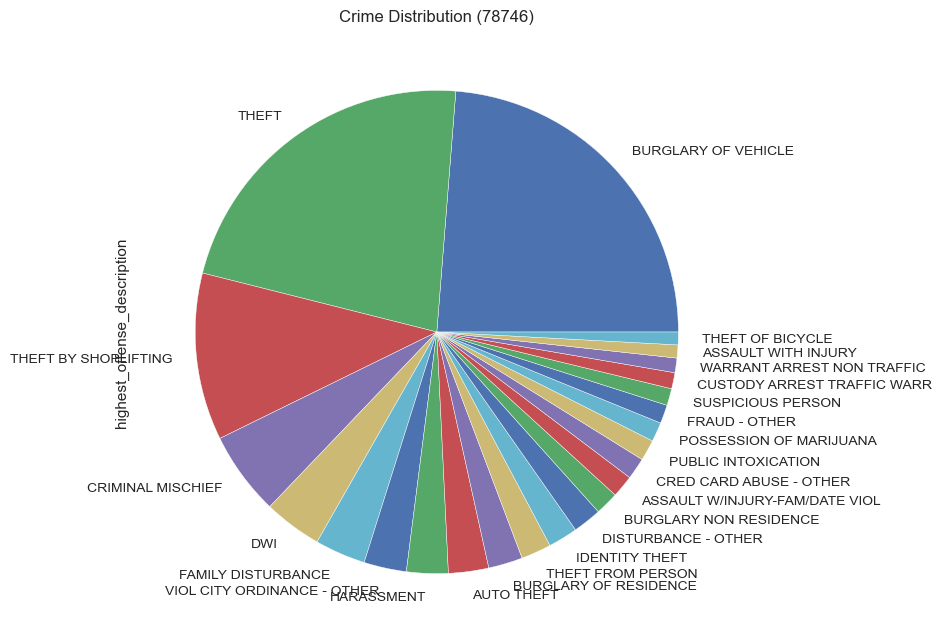

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off.to_frame())
display(
    df_46.highest_offense_description.value_counts(normalize=True).head(24).to_frame()
)
plt.figure(dpi=100)
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes istributed? 

In [18]:
# Creating separate dataframes for violent crime & murder rates

"""First, I wanted to update the naming of the offense types to make everything more presentable, 
including combining 'CAPITAL MURDER' with 'MURDER'."""

# df.highest_offense_description = df.highest_offense_description.replace(
#    {
#        "CAPITAL MURDER": "MURDER",
#        "AGG ROBBERY/DEADLY WEAPON": "ARMED ROBBERY",
#        "AGG ASSAULT": "AGGRAVATED ASSAULT",
#    }
# )

df_viol = df.query(
    'category_description == ["Aggravated Assault", "Robbery", "Rape", "Murder"]'
)
df_mur = df[df.category_description == "Murder"]
df_agg_asslt = df[df.category_description == "Aggravated Assault"]
df_robbery = df[df.category_description == "Robbery"]
df_rape = df[df.category_description == "Rape"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_mur_17 = df_mur[df_mur.year == 2017]
df_mur_18 = df_mur[df_mur.year == 2018]
df_mur_19 = df_mur[df_mur.year == 2019]
df_mur_20 = df_mur[df_mur.year == 2020]
df_mur_21 = df_mur[df_mur.year == 2021]

Theft                 568483
Burglary              116962
Auto Theft             44816
Aggravated Assault     35564
Robbery                20406
Rape                   13544
Murder                   548
Name: category_description, dtype: int64

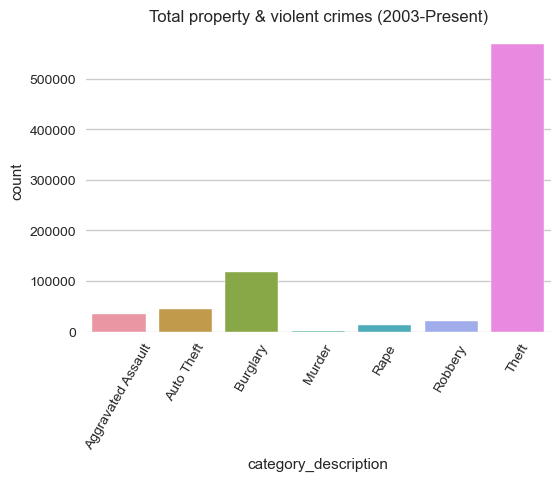

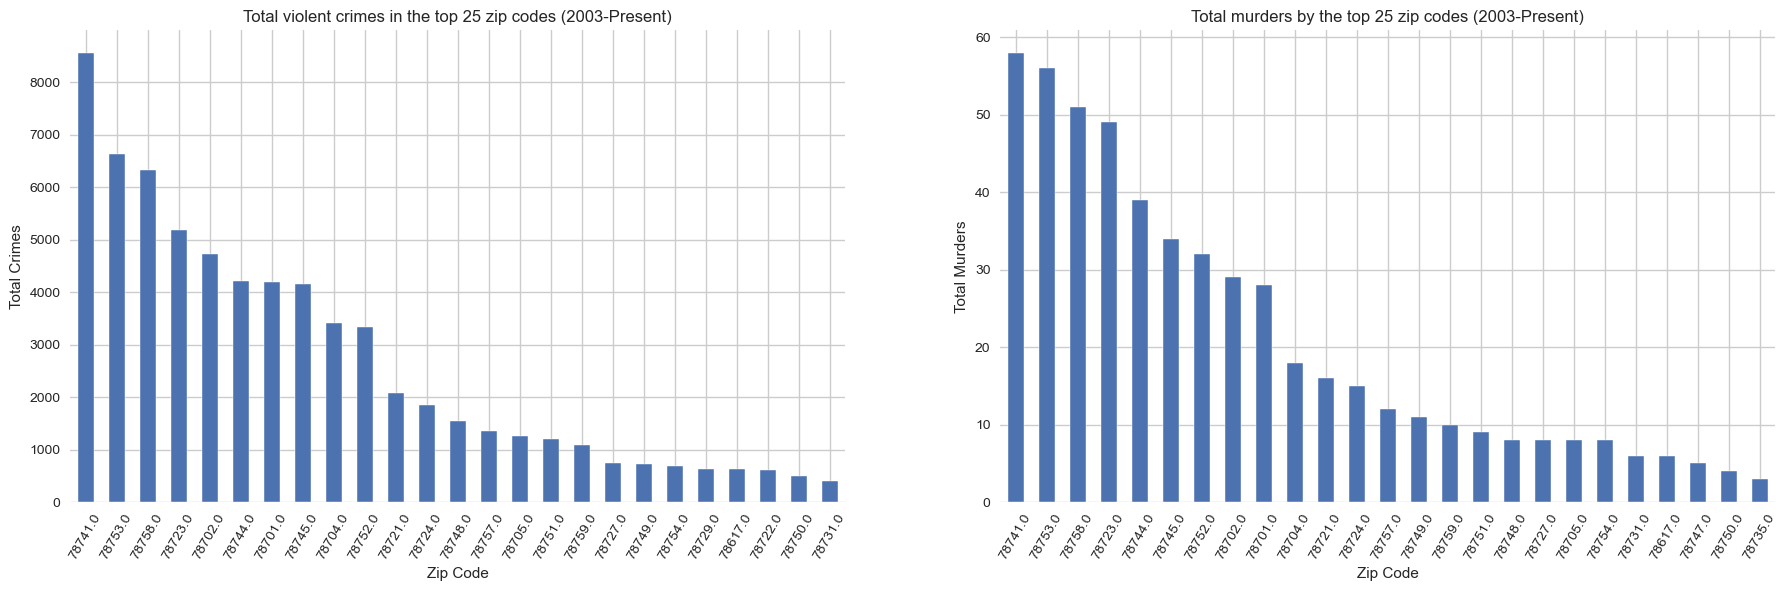

category_description  Aggravated Assault  Murder  Rape  Robbery
zip_code                                                       
0.0                                    1       0     0        0
78610.0                                2       0     3        0
78613.0                               45       1    29       58
78617.0                              353       6   157      106
78621.0                                2       0     0        0
78634.0                                1       0     0        0
78640.0                                0       0     3        0
78641.0                                1       0     0        0
78645.0                                0       0     1        0
78652.0                                7       0     1        1
78653.0                               36       1     7        5
78660.0                              155       3    42       57
78664.0                                7       0     8        0
78669.0                                0       0     1        0
78681.0                                3       0     3        0
78701.0                             2056      28   770     1349
78702.0                             2427      29   616     1656
78703.0                              166       2    85      113
78704.0                             1632      18   776      988
78705.0                              496       8   449      312
78712.0                                1       0     3        0
78717.0                              153       1    46       39
78719.0                               26       0     3       10
78721.0                             1300      16   311      444
78722.0                              268       3    98      241
78723.0                             2586      49   806     1745
78724.0                             1148      15   355      341
78725.0                               76       1    43       13
78726.0                              172       2    93       32
78727.0                              416       8   176      152
78728.0                               21       1    12        3
78729.0                              338       2   151      137
78730.0                               36       0    17        4
78731.0                              188       6   118       89
78732.0                                1       0     2        1
78733.0                                2       0     5        1
78735.0                              224       3    76       47
78736.0                               59       0    30       13
78737.0                                8       0     5        1
78738.0                                1       0     0        0
78739.0                               37       0    40        4
78741.0                             4137      58  1369     2999
78742.0                               83       2    20       24
78744.0                             2344      39   893      938
78745.0                             2230      34   860     1024
78746.0                              127       3    78      134
78747.0                              237       5    95       45
78748.0                              833       8   381      317
78749.0                              362      11   202      144
78750.0                              256       4   138      105
78751.0                              523       9   279      392
78752.0                             1628      32   489     1190
78753.0                             3343      56  1136     2091
78754.0                              383       8   158      141
78756.0                              156       2    99       96
78757.0                              682      12   236      416
78758.0                             3120      51  1092     2074
78759.0                              550      10   255      276

<Figure size 432x288 with 0 Axes>

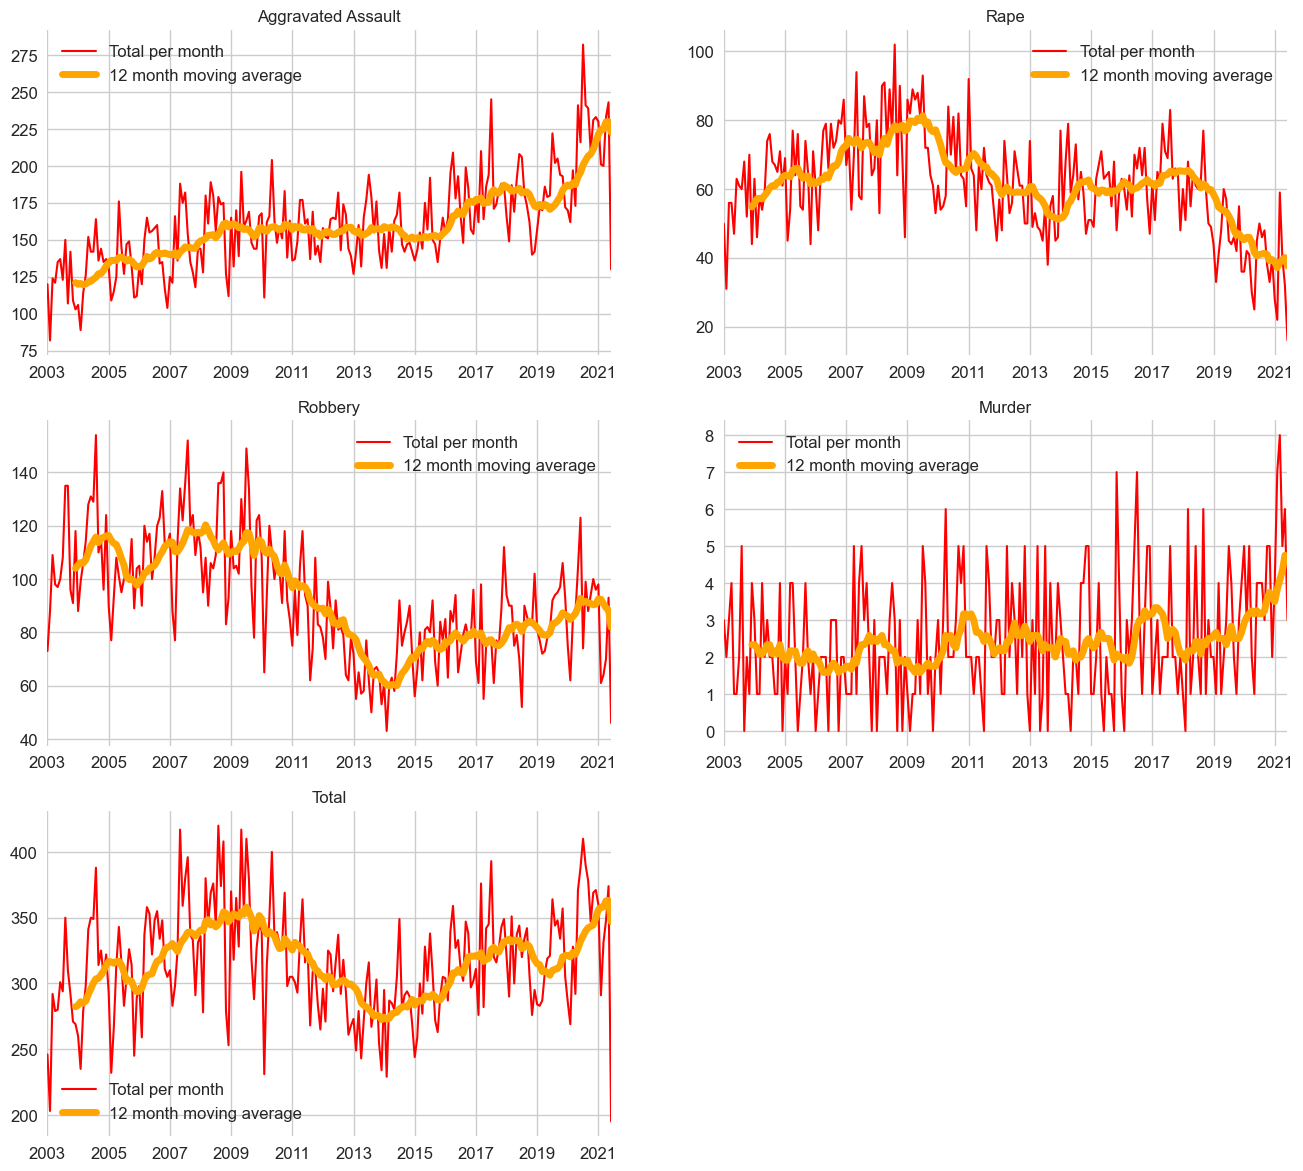

In [28]:
plt.figure(dpi=100)
plt.xlabel("Crime Type")
plt.ylabel("Total Incidents")
plt.xticks(rotation="60")
sb.countplot(df.category_description).set_title(
    "Total property & violent crimes (2003-Present)"
)

# display(df_viol.zip_code.value_counts(normalize=True).head(25))
display(df.category_description.value_counts())

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2, dpi=100)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Total violent crimes in the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
    ax=axs[0],
)
df_mur.zip_code.value_counts().head(25).plot.bar(
    title="Total murders by the top 25 zip codes (2003-Present)",
    xlabel="Zip Code",
    ylabel="Total Murders",
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.category_description)
mur_freq = pd.crosstab(df_mur.zip_code, df_mur.category_description)
display(viol_freq)

monthly_viol = pd.DataFrame(
    df_viol[df_viol["category_description"] == "Aggravated Assault"]
    .resample("M")
    .size()
)
monthly_viol.columns = ["Aggravated Assault"]

for i in df_viol["category_description"].unique():
    monthly_viol[i] = pd.DataFrame(
        df_viol[df_viol["category_description"] == i].resample("M").size()
    )

monthly_viol["Total"] = monthly_viol.sum(axis=1)

ViolCrimeTypes = monthly_viol.columns

plt.figure(1)
plt.figure(figsize=(16, 25), dpi=100)

i = 521
for eachCrime in ViolCrimeTypes:
    plt.subplot(i)
    monthly_viol[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly_viol[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

Currently, 78741 shares 13.07% of violent crime, followed by 78753, sharing 9.92%.


### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

<Figure size 600x400 with 0 Axes>

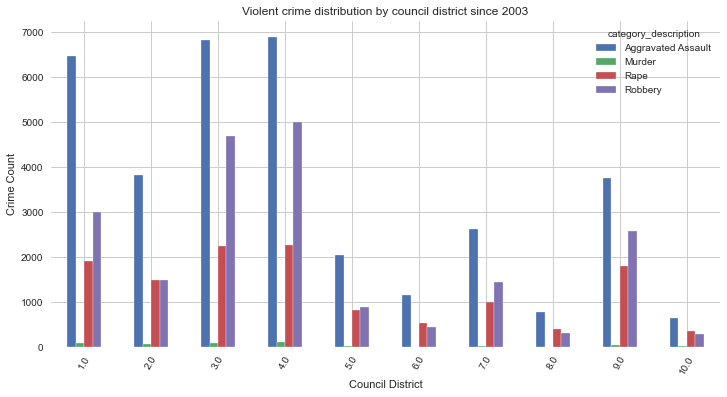

<Figure size 600x400 with 0 Axes>

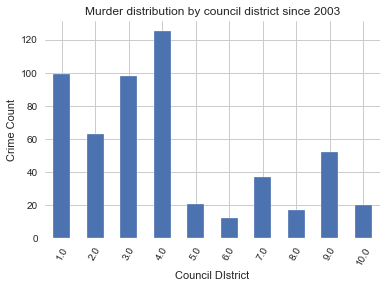

<Figure size 600x400 with 0 Axes>

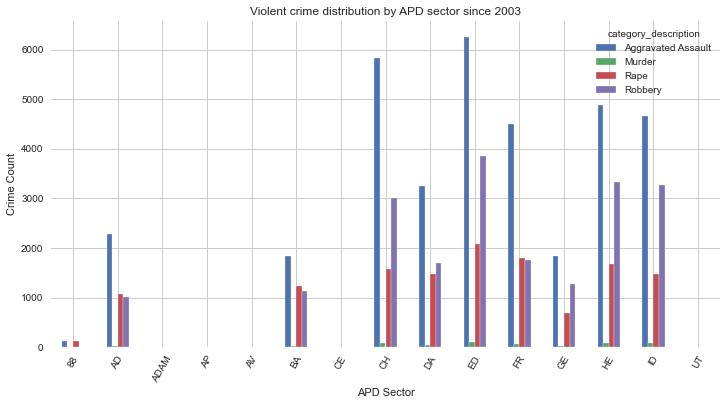

<Figure size 600x400 with 0 Axes>

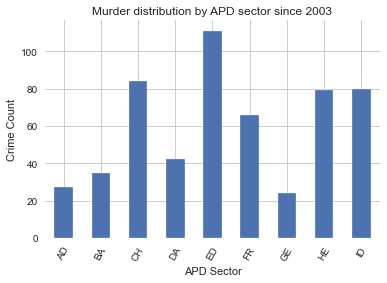

<Figure size 600x400 with 0 Axes>

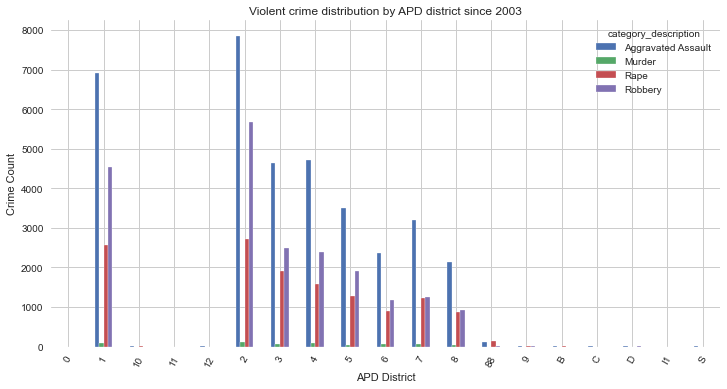

<Figure size 600x400 with 0 Axes>

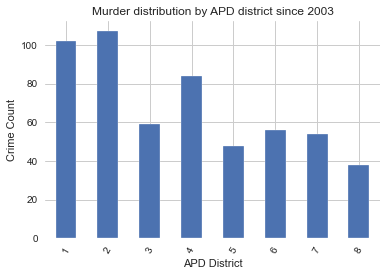

In [20]:
plt.figure(dpi=100)
pd.crosstab(df_viol.council_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    rot=60,
    xlabel="Council District",
    ylabel="Crime Count",
    title="Violent crime distribution by council district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.council_district, df_mur.category_description).plot.bar(
    rot=60,
    xlabel="Council DIstrict",
    ylabel="Crime Count",
    title="Murder distribution by council district since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_sector, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD sector since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_sector, df_mur.category_description).plot.bar(
    xlabel="APD Sector",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD sector since 2003",
    legend=False,
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_viol.apd_district, df_viol.category_description).plot.bar(
    figsize=(12, 6),
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Violent crime distribution by APD district since 2003",
)
plt.show()

plt.figure(dpi=100)
pd.crosstab(df_mur.apd_district, df_mur.category_description).plot.bar(
    xlabel="APD District",
    ylabel="Crime Count",
    rot=60,
    title="Murder distribution by APD district since 2003",
    legend=False,
)
plt.show()

### K. Violent crime and murder distribution by location type

category_description                            Aggravated Assault  Murder  \
location_type                                                                
ABANDONED/CONDEMNED STRUCTURE                                   21       1   
AMUSEMENT PARK                                                   1       0   
ARENA / STADIUM / FAIRGROUNDS / COLISEUM                         2       0   
ATM SEPARATE FROM BANK                                           2       0   
AUTO DEALERSHIP NEW / USED                                      13       0   
BANKS / SAVINGS & LOAN                                          17       1   
BAR / NIGHT CLUB                                               758      12   
CAMP / CAMPGROUND                                               43       0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                            34       1   
COMMERCIAL / OFFICE BUILDING                                   406       9   
COMMUNITY CENTER                                                 9       0   
CONSTRUCTION SITE                                               38       0   
CONVENIENCE STORE                                              283       3   
DAYCARE FACILITY                                                 0       0   
DEPARTMENT / DISCOUNT STORE                                     62       0   
DRUG STORE / DR. OFFICE / HOSPITAL                             122       6   
FIELD / WOODS                                                  289      19   
GAMBLING FACILITY / CASINO / RACE TRACK                         10       1   
GAS / SERVICE STATIONS                                         265       6   
GOVERNMENT / PUBLIC BUILDING                                   113       2   
GROCERY / SUPERMARKET                                           72       2   
HOTEL / MOTEL / ETC.                                           766      14   
INDUSTRIAL SITE                                                  5       0   
JAIL / PRISON                                                    6       0   
LAKE / WATERWAY                                                 10       1   
LIQUOR STORE                                                     9       1   
OTHER / UNKNOWN                                                468      13   
PARK / PLAYGROUND                                              181       1   
PARKING LOTS / GARAGE                                         4894     102   
RENTAL STORAGE FACILITY                                         20       1   
RESIDENCE / HOME                                             17749     236   
REST AREA                                                        2       0   
RESTAURANTS                                                    258       3   
SCHOOL - COLLEGE / UNIVERSITY                                    5       0   
SCHOOL - ELEMENTARY / SECONDARY                                 11       0   
SCHOOLS / COLLEGES                                              43       2   
SHELTER-MISSION / HOMELESS                                      22       0   
SHOPPING MALL                                                    9       0   
SPECIALTY  STORE (TV  FUR ETC.)                                 51       0   
STREETS / HWY / ROAD / ALLEY                                  8331     108   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                 111       1   
TRIBAL LANDS                                                     0       0   

category_description                            Rape  Robbery  
location_type                                                  
ABANDONED/CONDEMNED STRUCTURE                     14       12  
AMUSEMENT PARK                                     1        2  
ARENA / STADIUM / FAIRGROUNDS / COLISEUM           0        0  
ATM SEPARATE FROM BANK                             0        8  
AUTO DEALERSHIP NEW / USED                         2        2  
BANKS / SAVINGS & LOAN                            10      395  
BAR / NIGHT CLUB                                 158   

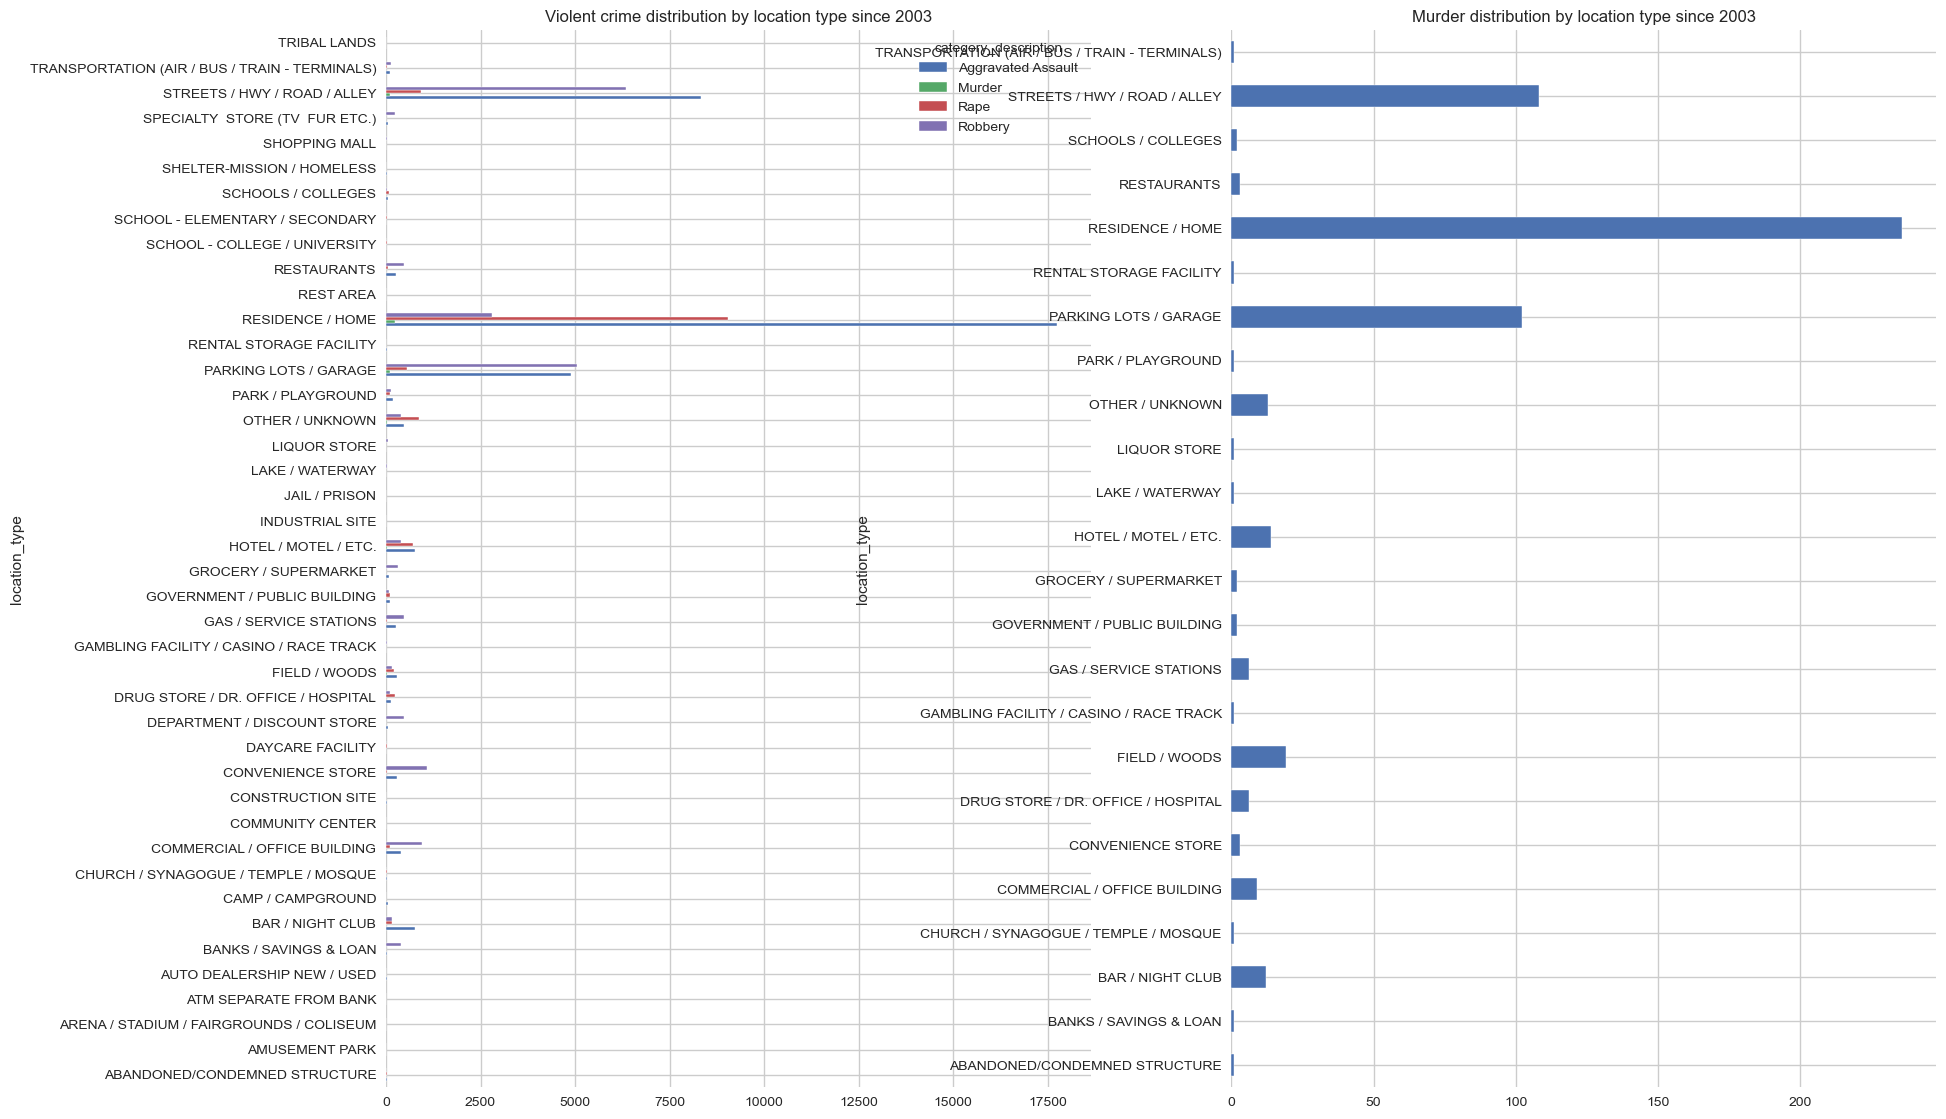

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.category_description)
display(viol_loc)

mur_loc = pd.crosstab(df_mur.location_type, df_mur.category_description)

fig, axs = plt.subplots(figsize=(20, 14), dpi=100, ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003", ax=axs[0],
)
mur_loc.plot.barh(
    title="Murder distribution by location type since 2003", legend=False, ax=axs[1]
)
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Robbery 

In [23]:
agg_robbery_coords_heat = df_robbery[
    (df_robbery["latitude"].isnull() == False)
    & (df_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_mur[
    (df_mur["latitude"].isnull() == False) & (df_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(50).to_frame()

address
00 BLOCK UNKNOWN                    163
900 BLOCK E 32ND ST                 146
1137 GUNTER ST                      143
1030 NORWOOD PARK BLVD              135
500 E 7TH ST                        131
6409 SPRINGDALE RD                  131
1700 BURTON DR                      126
1071 CLAYTON LN                     115
9024 NORTHGATE BLVD                 110
6103 MANOR RD                       109
9200 NORTH PLZ                      106
1124 RUTLAND DR                     103
1054 SPRINGDALE RD                  103
2901 S CAPITAL OF TEXAS HWY NB       97
9601 MIDDLE FISKVILLE RD             96
5800 TECHNI CENTER DR                94
9515 N LAMAR BLVD                    93
1000 E 41ST ST                       92
1500 FARO DR                         91
6118 FAIRWAY ST                      90
10000 N LAMAR BLVD                   89
700 BLOCK E 8TH ST                   88
7020 GRAND CANYON DR                 88
8800 N IH 35 SVRD SB                 87
12151 N IH 35 SVRD NB                87
1515 WICKERSHAM LN                   85
2237 E RIVERSIDE DR                  84
2401 S LAKESHORE BLVD                84
9300 NORTHGATE BLVD                  84
2500 BLOCK S CONGRESS AVE            83
9010 GALEWOOD DR                     81
7000 DECKER LN                       79
6855 E US 290 HWY SVRD EB            79
2201 WILLOW CREEK DR                 78
1300 CROSSING PL                     78
8312 N IH 35 SVRD SB                 78
3909 N IH 35 SVRD NB                 77
9001 NORTHGATE BLVD                  75
1845 BURTON DR                       75
2400 WICKERSHAM LN                   73
1601 ROYAL CREST DR                  73
8926 N LAMAR BLVD                    72
4404 E OLTORF ST                     72
2101 BURTON DR                       71
1600 WICKERSHAM LN                   69
4900 BLOCK MUELLER BLVD              69
2005 WILLOW CREEK DR                 69
3603 SOUTHRIDGE DR                   68
2200 S PLEASANT VALLEY RD            68
4700 E RIVERSIDE DR                  67

In [26]:
# Show addresses with 2 or more reported murders
df_mur.address.value_counts().head(35).to_frame()

address
6409 SPRINGDALE RD               3
8800 N IH 35 SVRD SB             3
4700 E RIVERSIDE DR              3
601 E 15TH ST                    3
6407 SPRINGDALE RD               3
8610 N LAMAR BLVD                3
200 BLOCK E 6TH ST               2
9220 N IH 35 SVRD SB             2
2400 WICKERSHAM LN               2
201 W 5TH ST                     2
9010 GALEWOOD DR                 2
6118 FAIRWAY ST                  2
815 W SLAUGHTER LN               2
4900 E OLTORF ST                 2
7000 DECKER LN                   2
1137 GUNTER ST                   2
9601 MIDDLE FISKVILLE RD         2
11105 N IH 35 SVRD NB            2
8912 N LAMAR BLVD                2
10610 MORADO CIR                 2
7330 BLUFF SPRINGS RD            2
2501 ANKEN DR                    2
2915 S IH 35 SVRD NB             2
1711 RUTLAND DR                  2
6600 ED BLUESTEIN BLVD SB        2
9036 N LAMAR BLVD                2
1200 BLOCK E 38TH HALF ST        2
833 FAIRFIELD DR                 2
1050 SPRINGDALE RD               2
605 MASTERSON PASS               2
9200 NORTH PLZ                   2
744 W WILLIAM CANNON DR          2
8225 SAM RAYBURN DR              2
2713 S CONGRESS AVE              2
10503 N LAMAR BLVD               2

In [27]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_mur_17.to_csv("df_mur_17.csv")
df_mur_18.to_csv("df_mur_18.csv")
df_mur_19.to_csv("df_mur_19.csv")
df_mur_20.to_csv("df_mur_20.csv")
df_mur_21.to_csv("df_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_mur.to_csv("df_mur.csv")
df_agg_asslt.to_csv("df_agg_asslt.csv")
df_rape.to_csv("df_rape.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")